# Multiple Linear Regression

In [98]:
'''To support multiple input features
Before we have seen only one input feature
This time we are going to take a look at multiple features
Using numpy '''

'To support multiple input features\nBefore we have seen only one input feature\nThis time we are going to take a look at multiple features\nUsing numpy '

In [99]:
#numpy and matplot library is going to be used 
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

#reduced display precion on numpy arrays
np.set_printoptions(precision = 2)

In [100]:
#create a problem statement table
#here it has 4 features 
#size in sq ft, # bedrooms, # floors and age of home
X_train = np.array([[2104,5,1,45], [1416,3,2,40], [852,2,1,35]])
y_train = np.array([460, 232, 178])

In [101]:
#here X is the vector containing input data samples
#here y_train is the output values in our training data set

#shape of X and y is
print(f"Shape of X is: {X_train.shape}, type of X_train is: {type(X_train)} and \nX_train is : \n{X_train}")

Shape of X is: (3, 4), type of X_train is: <class 'numpy.ndarray'> and 
X_train is : 
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]


In [102]:
#parameters w1, w2, w3 and w4 based on the features
#b is the scalar parameter
b_init = 785.1811367994083
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])

print(f"w_init shape is: {w_init.shape} and its type is {type(w_init)}, and b_init type: {type(b_init)}")

w_init shape is: (4,) and its type is <class 'numpy.ndarray'>, and b_init type: <class 'float'>


In [103]:
#prediction element by element when there is multiple features
def predict_single_loop(x, w, b):
    p = 0
    
    for i in range (x.shape[0]):
        p_i = w[i]*x[i]
        p = p + p_i
    p = p + b
    
    return p

In [104]:
#Extract a single row and make prediction
x_vec = X_train[0,:]
print(f"X vector shape: {x_vec.shape} and X vector value: {x_vec}")

#make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"Predicted output is: {f_wb} and shape: {f_wb.shape}")

X vector shape: (4,) and X vector value: [2104    5    1   45]
Predicted output is: 459.9999976194083 and shape: ()


# Same can be done using dot product of Vectors

In [105]:
#dot product of vectors consumes less time as compared to the row wise element multiplication'
#using arrays

def predict(x, w, b):
    
    p = np.dot(x, w) + b
    
    return p

In [106]:
#make the prediction for the same row
f_wb = predict(x_vec, w_init, b_init)
print(f"Predicted output is: {f_wb} and shape is {f_wb.shape}")

Predicted output is: 459.9999976194083 and shape is ()


In [107]:
#Compute cost with multiple variables J(w,b) = (1/2m)*(f w,b(x(i)) - y(i))^2)

def compute_cost(X, y, w, b):
    cost = 0.0
    #training data 'm'
    m = X.shape[0]
    
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
        
    cost = cost / (2*m)
    
    return cost

In [108]:
#calculate cost 

cost = compute_cost(X_train, y_train, w_init, b_init)
print(f"Cost at optimal w: {cost}")

Cost at optimal w: 1.5578904045996674e-12


In [109]:
#Calculating gradient descent with multiple variables

#dJ(w,b)/db and dJ(w,b)/dw

#number of training examples = m
#number of features = n


def compute_gradient(X, y, w, b):
    
    m,n = X.shape
    
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        err = (np.dot(w, X[i]) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + (err * X[i,j])
            
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [110]:
#calculate and compute gradient 
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, w_init, b_init)

print(f"dj_dw at initial w and b is: {tmp_dj_dw}")
print(f"dj_db at initial w and b is: {tmp_dj_db}")

dj_dw at initial w and b is: [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]
dj_db at initial w and b is: -1.6739251122999121e-06


In [111]:
#gradient descent with multiple variables
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, aplha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        
        dj_dw, dj_db = gradient_function(X, y, w, b)
        
        #update w and b parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i<1000000:
            J_history.append( cost_function(X, y, w, b))
            
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i: 4d}: Cost {J_history[-1]: 8.2f}")
            
    return w, b, J_history

In [114]:
#initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0

#some gradient descent settings
iterations = 1000
alpha = 5.0e-7

#run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, 
                                            compute_gradient,
                                           alpha, iterations)

print(f"b, w found by gradient descent: {b_final:0.2f}, {w_final}")

m, _ = X_train.shape
print(f"Shape of m is: {m}")

for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46
Iteration  100: Cost   695.99
Iteration  200: Cost   694.92
Iteration  300: Cost   693.86
Iteration  400: Cost   692.81
Iteration  500: Cost   691.77
Iteration  600: Cost   690.73
Iteration  700: Cost   689.71
Iteration  800: Cost   688.70
Iteration  900: Cost   687.69
b, w found by gradient descent: -0.00, [ 0.2   0.   -0.01 -0.07]
Shape of m is: 3
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


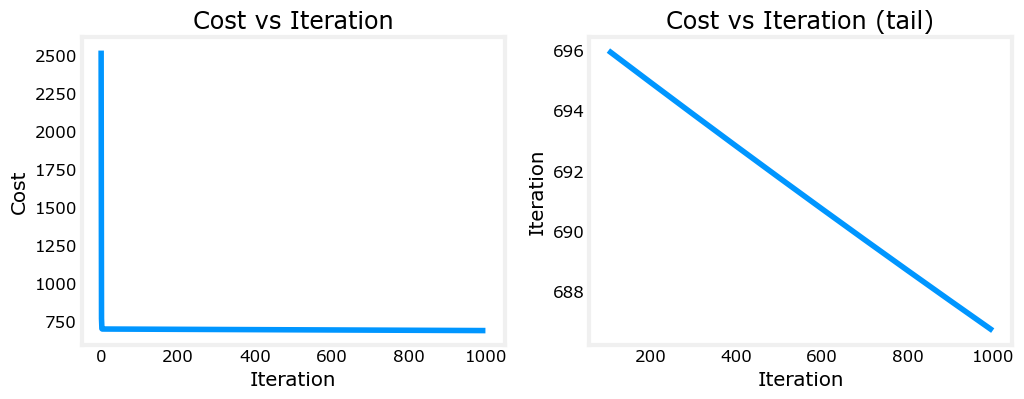

In [116]:
#plot costs vs iterations
fig, (ax1, ax2) = plt.subplots(1,2, , constrained_layout = Truefigsize = (12,4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])

ax1.set_title("Cost vs Iteration")
ax2.set_title("Cost vs Iteration (tail)")
ax1.set_ylabel('Cost')
ax2.set_ylabel("Iteration")

ax1.set_xlabel("Iteration")
ax2.set_xlabel("Iteration")

plt.show()